In [48]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [49]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [51]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=1)
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.44328969391573725

In [52]:
print(r.coef_)
print(r.intercept_)

[28.26012268]
-2.1364554593528724


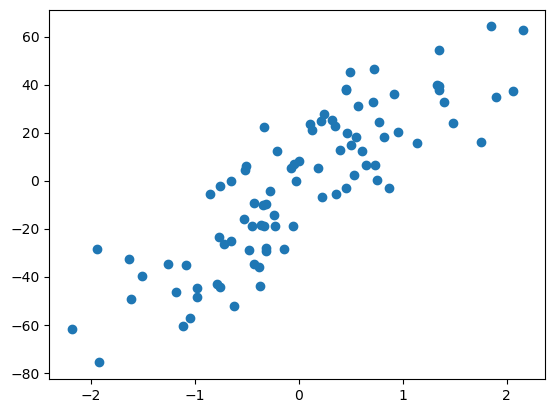

In [53]:
plt.scatter(x_train,y_train)

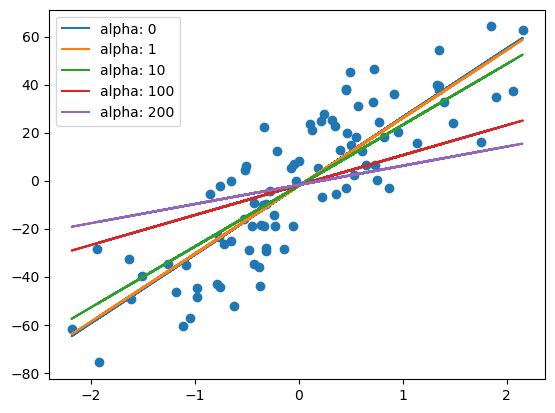

In [54]:
alpha=[0,1,10,100,200]
cs=['g','r','orange','purple','black']
plt.scatter(x_train,y_train)
for alp,c in zip(alpha,cs):
    r1=Ridge(alpha=alp)
    r1.fit(x_train,y_train)
    plt.plot(x_train,r1.predict(x_train),label="alpha: {}".format(alp))
plt.legend()    
plt.show()    

In [55]:
class mera_ridge:
    def __init__(self,alpha=1):
        self.alpha=alpha
        self.m=None
        self.b=None
    def fit(self,x_train,y_train):
        num=0
        den=0
        for i in range(x_train.shape[0]):
            num=num+(y_train[i] - y_train.mean()) * (x_train[i] - x_train.mean())
            den=den+(x_train[i] - x_train.mean())**2

        self.m=num / (den+self.alpha)    
        self.b=y_train.mean() - (self.m * x_train.mean())
        print(self.m,self.b)

    def predict():    
        pass

In [56]:
rid=mera_ridge(alpha=1)
rid.fit(x_train,y_train)


[28.26012268] [-2.13645546]


** for more input columns **

In [57]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

In [58]:
X,y=load_diabetes(return_X_y=True)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.linear_model import Ridge
rg=Ridge(alpha=1,solver='cholesky')
rg.fit(x_train,y_train)
y_pred=rg.predict(x_test)
r2_score(y_test,y_pred)

# Small dense datasets → cholesky or svd

# Large sparse datasets → sag, saga, or sparse_cg

# Default (auto) → Scikit-learn decides the best option

0.41915292635986545

In [61]:
rg.coef_

array([  45.36737726,  -76.66608563,  291.33883165,  198.99581745,
         -0.53030959,  -28.57704987, -144.51190505,  119.26006559,
        230.22160832,  112.14983004])

In [62]:
rg.intercept_

np.float64(152.241675211113)

In [63]:
class apna_ridge:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.intercept=None
        self.coef=None

    def fit(self,x_train,y_train):
        x_train=np.insert(x_train,0,1,axis=1)
        I = np.identity(x_train.shape[1])  # 10                        10 * 10 di identity matrix create hojegi
        I[0][0]=0
        result=np.linalg.inv(np.dot(x_train.T , x_train) + (self.alpha * I)).dot(x_train.T).dot(y_train)
        self.intercept=result[0]
        self.coef=result[1:]
        print(self.coef,self.intercept)


    def predict (self,x_test):
        return np.dot(x_test , self.coef) + self.intercept      

    def score(self,y_test,y_pred):
        return r2_score(y_test,y_pred)    

In [64]:
ar=apna_ridge(alpha=1)
ar.fit(x_train,y_train)
ar.predict(x_test)


[  45.36737726  -76.66608563  291.33883165  198.99581745   -0.53030959
  -28.57704987 -144.51190505  119.26006559  230.22160832  112.14983004] 152.24167521111303


array([157.28546958, 163.0077872 , 155.18015341, 247.34826661,
       143.86616554, 126.29572808, 218.14685793, 190.20760694,
       113.85217577, 134.55978605, 117.02118388, 144.48558675,
        87.28819205, 197.14093279, 125.50901858, 138.51500912,
       205.35970602, 220.7370995 , 169.06166719, 196.3266096 ,
       175.59408295, 114.95369133, 101.19431176, 180.24089489,
       146.93487166, 162.96966538, 174.9611055 , 169.48222124,
        80.99956831, 138.96441653, 170.06464339, 113.58144127,
       143.88931752, 176.39120165, 171.50662655, 180.29787161,
       141.03684751, 143.60519254, 165.05321624,  90.61274103,
       108.11538676, 129.73518901, 153.90040578, 164.58765418,
       166.09094995,  94.58802392, 102.54361131, 114.45469887,
        89.4579547 , 147.17708465, 139.75801733,  91.12427125,
       135.90101798, 123.0286566 , 175.74585939, 144.21794879,
       121.37741666, 181.99608278, 123.1472869 ,  90.51967849,
       178.64803583, 172.74960766, 140.23962168, 131.67

In [65]:
ar.score(y_test,y_pred)

0.41915292635986545

In [66]:
np.insert(x_train,0,1,axis=1)   # (kede set vich insert karna , kedi postion te karna , ki karna insert , col (1) or row(0))


array([[ 1.00000000e+00,  7.07687525e-02,  5.06801187e-02, ...,
         3.43088589e-02,  2.73640491e-02, -1.07769750e-03],
       [ 1.00000000e+00, -9.14709343e-03,  5.06801187e-02, ...,
         7.12099798e-02,  2.72478149e-04,  1.96328371e-02],
       [ 1.00000000e+00,  5.38306037e-03, -4.46416365e-02, ...,
        -2.59226200e-03,  1.70360713e-02, -1.35040182e-02],
       ...,
       [ 1.00000000e+00,  3.08108295e-02, -4.46416365e-02, ...,
        -3.94933829e-02, -1.09032507e-02, -1.07769750e-03],
       [ 1.00000000e+00, -1.27796319e-02, -4.46416365e-02, ...,
        -2.59226200e-03, -3.84597173e-02, -3.83566597e-02],
       [ 1.00000000e+00, -9.26954778e-02, -4.46416365e-02, ...,
        -3.94933829e-02, -5.14218980e-03, -1.07769750e-03]])

In [67]:
x_train.shape[1]

10